# Ternary Tree Mappings

Ternary trees are one of the most used classes of Fermion encodings, which includes the JordanWigner, BravyiKitaev, Parity and JKMN encodings.

You can create ones of these common ternary trees easily with built-in functions.

If you want a non-standard tree encoding it's easy to build these yourself.

In [1]:
from ferrmion import TernaryTree
from ferrmion.visualise import draw_tt

## Standard Encodings

Ferrmion inbuild functions for the common encodings
- `JordanWigner()` or `JW()`
- `BravyiKitaev()` or `BK()`
- `ParityEncoding()`
- `JKMN()`

The most simple, and common is JordanWigner

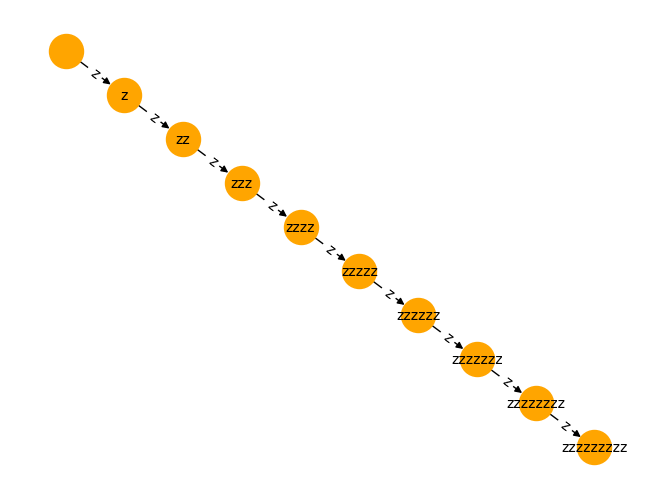

In [2]:
from ferrmion.encode import JordanWigner
jw = JordanWigner(10)
draw_tt(jw, type="linear")

### Converting Trees

Given a tree, we can easily convert it to one of the standard encodings.

We want an interesting example of how to grow a tree ourselves, so let's look at Bravyi-Kitaev.

We'll first make one by converting our JordanWigner tree above (of course we could just import and call the fuction like we did above.)

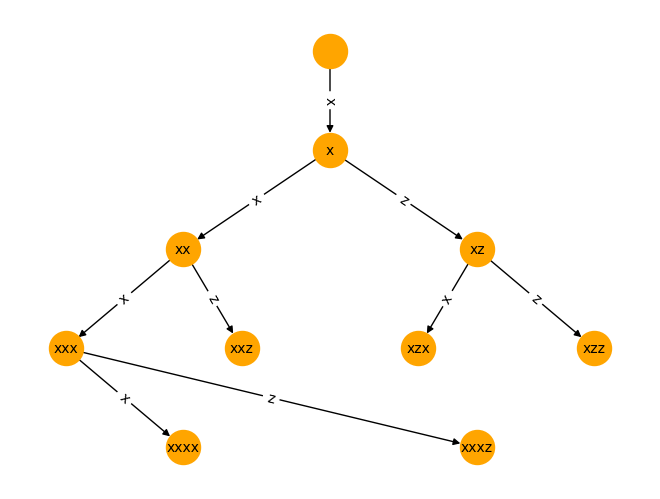

In [3]:
bk = jw.BravyiKitaev()
draw_tt(bk)

## Custom Encodings

Several methods, such as the Bonsai Algorithm and HATT, require building ternary trees on the fly.

`ferrmion` allows you to do this by adding branches.
Let's see how to do this by recreating the BravyiKitaev encoding above.

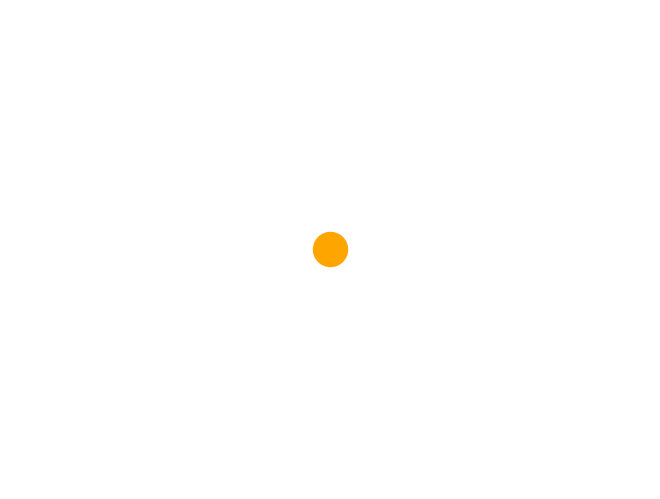

In [4]:
mytt = TernaryTree(n_modes=10)
draw_tt(mytt)

First lets add the left most branch. We can do this by adding a node at `xxxx`. 

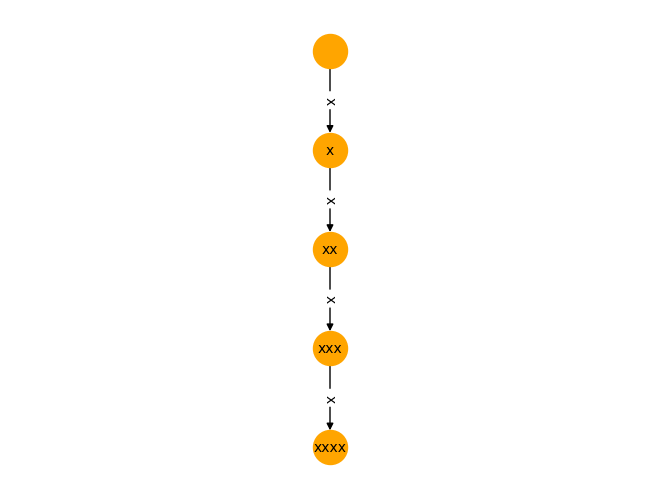

In [5]:
mytt.add_node("xxxx")
draw_tt(mytt)

Because no nodes existed in the path to `xxxx` these were created too!

If we wanted to add the node at `xxz`, then all the nodes to this path exist already.

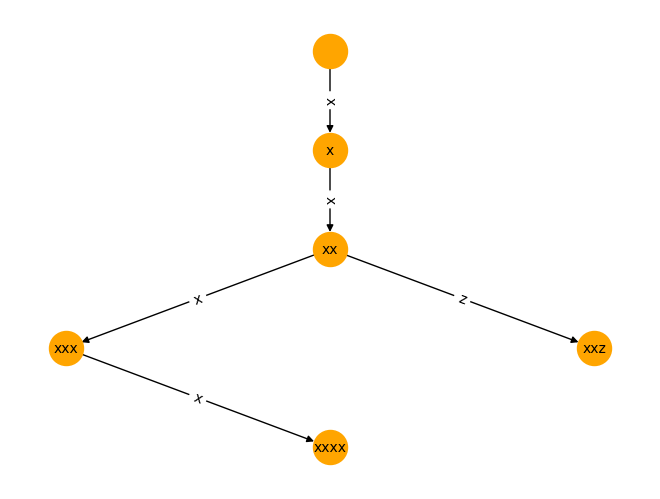

In [6]:
mytt.add_node("xxz")
draw_tt(mytt)

Let's finish growing the BK tree above.

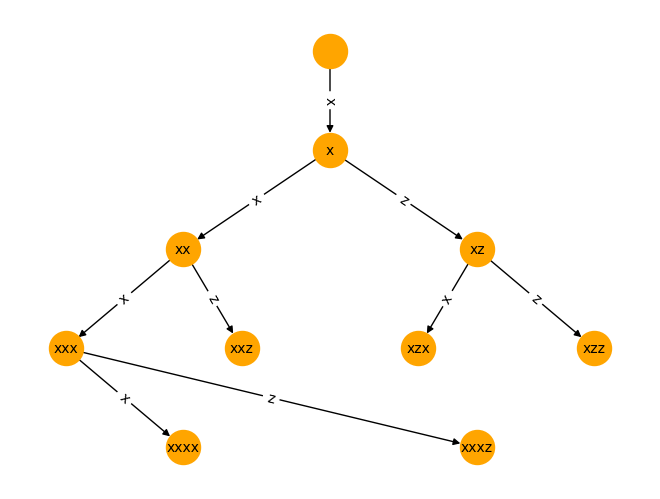

In [7]:
mytt.add_node("xxxz")
mytt.add_node("xzx")
mytt.add_node("xzz")
draw_tt(mytt)

# Enumeration Scheme

One way to encode a fermionic Hamiltonian is majorana-string encoding. For each fermionic mode we build operators from a pair of majorana-operators.
$$a^{\dagger}_j = \frac{1}{2}(\gamma_{2j} - i\gamma_{2j+1})$$
$$a_j = \frac{1}{2}(\gamma_{2j} + i\gamma_{2j+1})$$

The first step in encoding $N$ fermionic modes is then to produce a set of $2N$ pauli-strings whcih have the same properties as the Majorana operators:

1. Each Majorana is mapped to a Pauli string $m_{j} \to S_{k}\in S$ for $j,k=0,\dots,2N-1$
2. Commutation: The Pauli strings satisfy $\{  S_{i},S_{j} \}=2\delta_{ij}\mathbb{1}$
3. The operators are linearly independent
4. Algebraically independent: For all unequal subsets $A \subseteq S$ and $B \subseteq S$ such that $A \ne B$, $\prod_{S_{i}\in A}S_{i}\propto \prod_{S_{j}\in B}S_{j}$ is not fulfilled.

Ternary-trees give us a method to generate valid sets of pauli-strings, but we also need to specify which fermionic modes are represented by which pauli-strings, and which physical qubits map to which logical qubits.

To understand why this is important it's easiest to go through some examples.

Let's start by defining a JordanWigner Ternary Tree.

In [8]:
from ferrmion.encode import JordanWigner
from ferrmion.visualise import draw_tt, symplectic_matshow

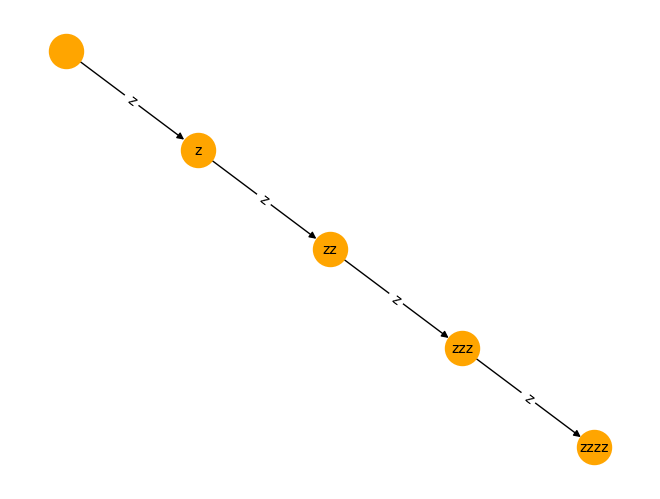

In [9]:
jw = JordanWigner(5)
draw_tt(jw, type="linear")

For each node on the tree, we build up two Pauli strings to be used as Majorana operators.

In [10]:
jw.string_pairs

{'': ('x', 'y'),
 'z': ('zx', 'zy'),
 'zz': ('zzx', 'zzy'),
 'zzz': ('zzzx', 'zzzy'),
 'zzzz': ('zzzzx', 'zzzzy')}

## Naive Enumeration

The simplest way to create a JW encoding is with the naive enumeration, which assigns the node highest in the tree to mode 0 and qubit 0, with indices for both increasing in lock-step as we go down the tree.

{'': (0, 0), 'z': (1, 1), 'zz': (2, 2), 'zzz': (3, 3), 'zzzz': (4, 4)}


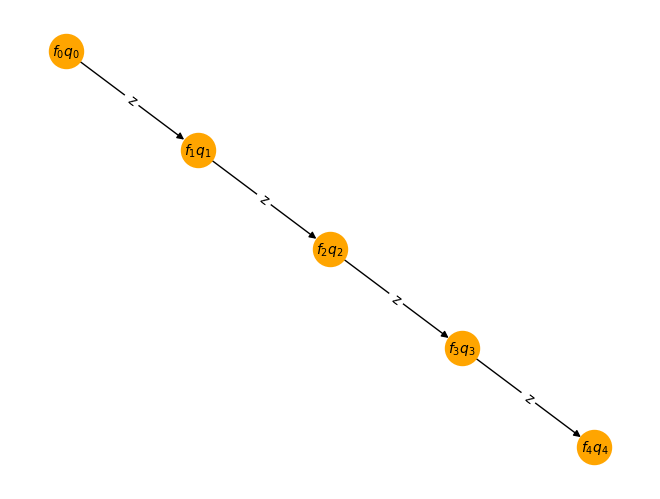

In [11]:
jw_naive = JordanWigner(5)
print(jw.default_enumeration_scheme())
draw_tt(jw_naive, enumeration_scheme=jw_naive.default_enumeration_scheme(), type="linear")

If we look at the Pauli strings generated by this encoding, we see a very simple structure.

We'll plot each of the pauli-strings, with color indicating which Pauli operator is applied to which qubit.

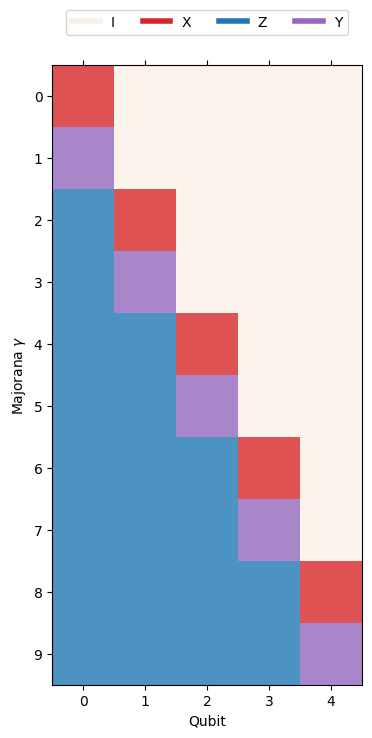

In [12]:
from ferrmion.visualise import symplectic_matshow
symplectic_matshow(jw_naive._build_symplectic_matrix()[1])

This is often thought of as "the" JordanWigner encoding, but we could assign each node in the tree to any of the N fermionic modes, and any of the N qubits. So really, there are $N^2$ JordanWigner encodings!

## Enumerating Fermionic Modes

As an example, let's swap modes 1 and 4, but keep the qubits the same.

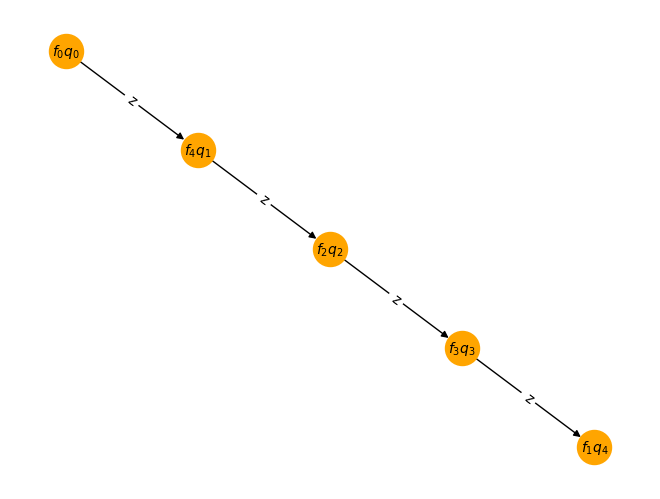

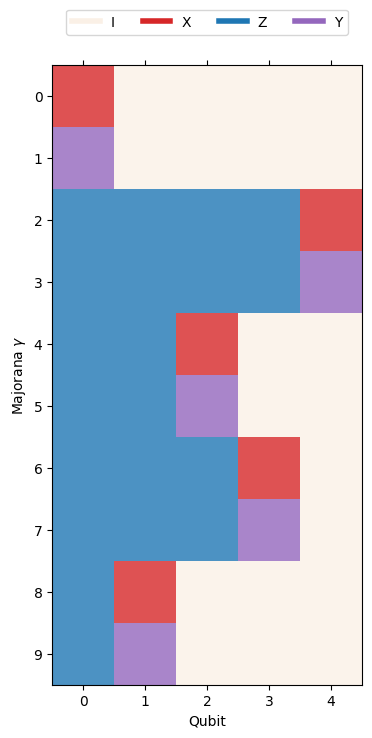

In [13]:
from ferrmion.encode import JordanWigner
jw = JordanWigner(5)
jw.enumeration_scheme = {'': (0, 0), 'z': (4, 1), 'zz': (2, 2), 'zzz': (3,3), 'zzzz': (1,4)}
draw_tt(jw, enumeration_scheme=jw.enumeration_scheme, type="linear")
symplectic_matshow(jw._build_symplectic_matrix()[1])

now the pauli operators for fermionic modes 3 and 4 have been swapped!

## Enumerating Qubits

We can do the same thing, but this time swap qubits 1 and 4, while leaving the fermion modes unaltered.

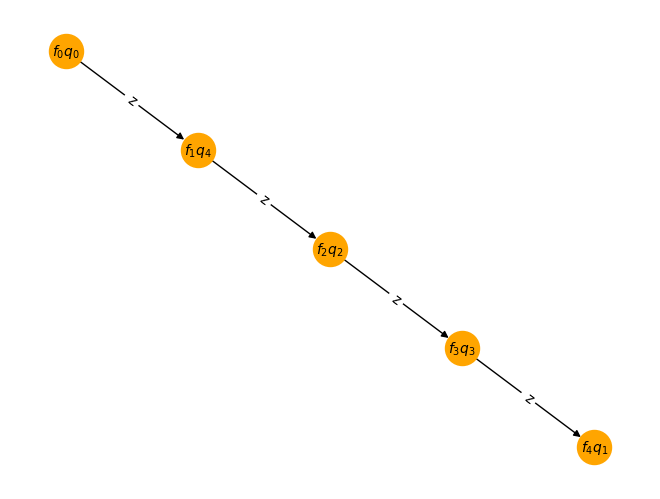

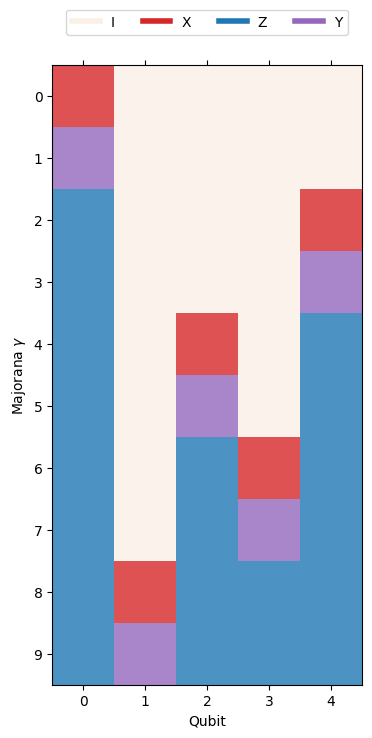

In [14]:
from ferrmion.encode import JordanWigner
jw = JordanWigner(5)
jw.enumeration_scheme = {'': (0, 0), 'z': (1, 4), 'zz': (2, 2), 'zzz': (3,3), 'zzzz': (4,1)}
draw_tt(jw, enumeration_scheme=jw.enumeration_scheme, type="linear")
symplectic_matshow(jw._build_symplectic_matrix()[1])

here the Pauli-strings for each fermionic mode contain the same operators, but the order of operators in the string (and therefore which qubit they apply to) has been changed!

If you want to know more about why this is important, see the notebook on [Optimising for Pauli-weight](https://ferrmion.readthedocs.io/en/latest/notebooks/pauli_weight.html) or the [Retuced Entanglement Ternary Tree](https://ferrmion.readthedocs.io/en/latest/notebooks/rett.html).